In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [202]:
df = pd.read_csv(r'C:\Users\najmi\Downloads\CC GENERAL.csv')
df.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [203]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [204]:
# impute with median
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

X = df.drop("CUST_ID", axis=1)

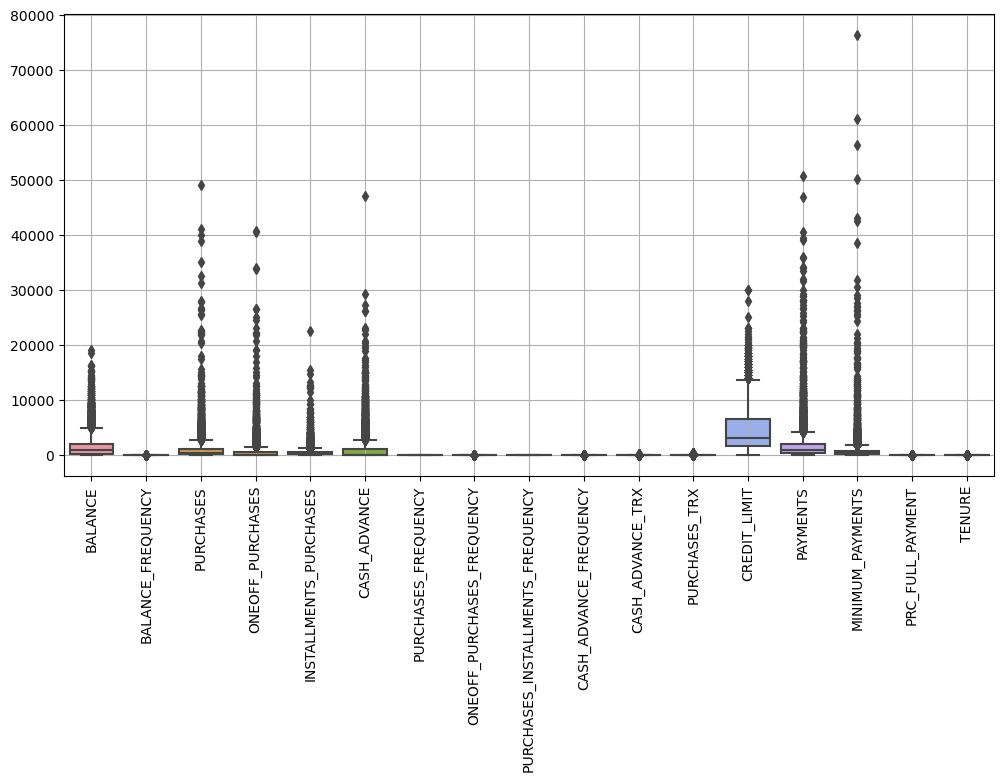

In [205]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.grid(plt.xticks(rotation = 90))
plt.show()


In [206]:
#for column_name in X.columns:
#    Q3 = X[column_name].quantile(0.75)
#    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR

    # Filter rows based on the condition using .loc and handle NaN values
#    X = X.loc[~((X[column_name] < lower_bound) | (X[column_name] > upper_bound))]


#plt.figure(figsize=(12, 6))
#sns.boxplot(data=X)
#plt.grid(plt.xticks(rotation = 90))
#plt.show()


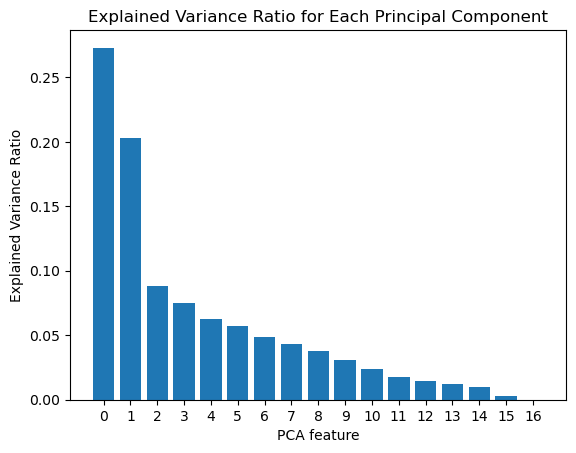

2


In [207]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming X is your data with features a, b, c, d, e
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()

# Fit PCA on the preprocessed data
pca.fit(X_scaled)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Explained Variance Ratio')
plt.xticks(features)
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

# Step 3: Determine the number of components for a threshold (e.g., 10%)
threshold_variance = 0.15
n_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > threshold_variance])

print(n_components)


In [208]:
pca = PCA(n_components=n_components)
X_PCA = pca.fit_transform(X_scaled)

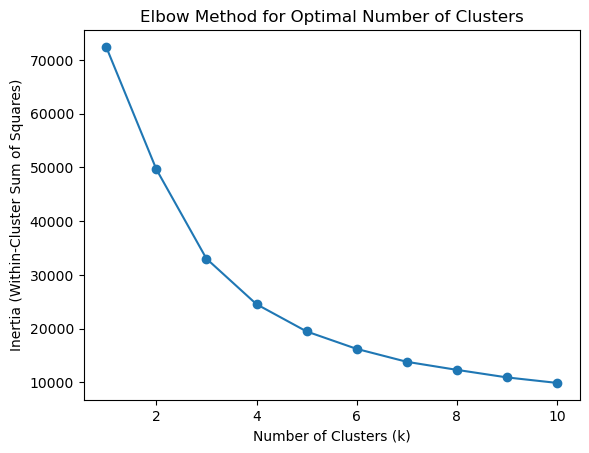

In [225]:
inertia_values = []
possible_n_clusters = range(1, 11)  # You can adjust the range based on your dataset

for n_clusters in possible_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_PCA)
    inertia_values.append(kmeans.inertia_)

# Step 2: Plot the elbow curve
plt.plot(possible_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [210]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

labels = kmeans.fit_predict(X_PCA)

X['labels'] = kmeans.labels_

X.set_index('labels', inplace=True)

In [211]:
# Assuming X is your DataFrame with the 'labels' column
grouped_means = X.groupby('labels').mean()

# Display the mean values for each group
grouped_means



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
labels,,,,,,,,,,,,,,,,,
0,1012.015954,0.799536,222.980202,157.253826,66.055490,613.558647,0.190099,0.074731,0.110111,0.122353,2.259826,2.956100,3108.959503,855.313300,551.136406,0.066146,11.364216
1,825.786010,0.920301,1237.583474,622.592817,615.195740,147.718821,0.862592,0.302365,0.675116,0.030723,0.570037,21.329172,4253.279614,1329.970479,583.423702,0.282922,11.661693
2,4505.865912,0.963515,462.628331,300.247673,162.479912,4400.456157,0.266446,0.129792,0.166388,0.470794,13.773676,6.717496,7449.201080,3542.539456,2060.458227,0.034992,11.439807
3,3407.930310,0.988404,6901.170916,4516.913486,2385.452649,774.694615,0.954352,0.726123,0.808566,0.084975,2.368526,82.980080,9548.705179,6730.862051,1831.212618,0.286595,11.960159


In [212]:
# Assuming X is your DataFrame with the 'labels' column
cluster_counts = X.groupby('labels').size()
grouped_means["Counts"] = cluster_counts
# Display the count of each label and cluster combination
cluster_counts

labels
0    3918
1    3284
2    1246
3     502
dtype: int64

In [227]:
selected_col = ['Counts','BALANCE_FREQUENCY','PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT','INSTALLMENTS_PURCHASES']

grouped_means[selected_col]

#cluster 2 has the highest cash advance frequency but low purchases, we can create feedback for them about their spending behavior and do promotion

#cluster 3 has the highest purchases, create a loyalty program for them 

#increase credit limit for cluster 0, to make them easy to use our service
#make a campaign for using our service, to increase purchases, increase number of loyal customer
#especially for cluster 0 
#lucky draw for purchases above RM**** in a purchase using our service

,Counts,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,INSTALLMENTS_PURCHASES
labels,,,,,,,
0,3918,0.799536,222.980202,2.259826,0.122353,3108.959503,66.055490
1,3284,0.920301,1237.583474,0.570037,0.030723,4253.279614,615.195740
2,1246,0.963515,462.628331,13.773676,0.470794,7449.201080,162.479912
3,502,0.988404,6901.170916,2.368526,0.084975,9548.705179,2385.452649


Clusters 0, 1, 2, and 3 each provide unique insights for targeted strategies. Cluster 0, with moderate activity, we may benefit them from personalized financial guidance and promotions beacuse of their low value for almost our column. It may indicates that they are rarely using our service at full potential. 
      Cluster 1, characterized by a high balance frequency and moderate purchases, could be engaged through tailored credit limit adjustments and investment opportunities. From my perspective, this cluster not far apart from the previous. We can do a lucky draw campaign for them to encaurage them in utilizing our service frequently. 
         Cluster 2, displaying high purchase and low cash advances, suggests a need for feedback to understand preferences and create promotions. We can created a feedback to find what spending behavior those fellows usually involved and bring up promotion related to that.
              Lastly, Cluster 3, marked by loyalty, is an ideal candidate for an exclusive loyalty program and the main target for our company profit investment in customers. By leveraging insights from each cluster, the bank can implement targeted strategies that enhance customer satisfaction, drive engagement, and ultimately contribute to increased profitability.For example, giving them voucher once every three month or on holiday. They also can be rewarded by exclusive reward by us such as limited edition things or holiday package reward. This reward absolutely cannot be compare with the previous lucky draw cause it only for the loyal candidates.

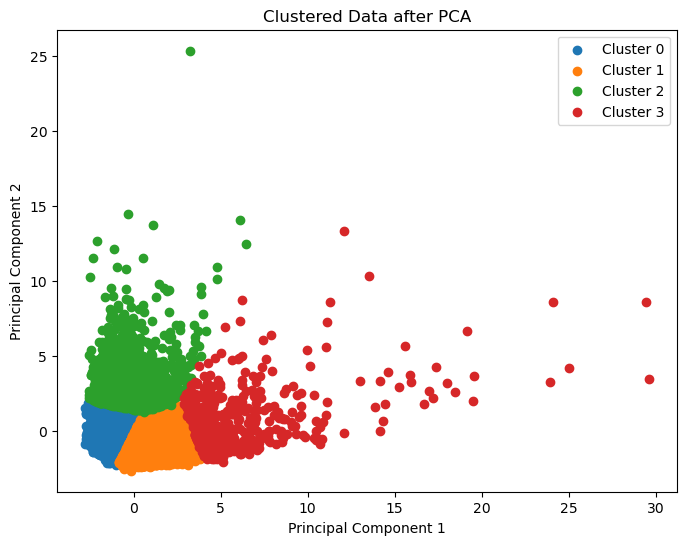

In [219]:

plt.figure(figsize=(8, 6))

for cluster_label in range(n_clusters):
    cluster_mask = (labels == cluster_label)
    plt.scatter(X_PCA[cluster_mask, 0], X_PCA[cluster_mask, 1], label=f'Cluster {cluster_label}', cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data after PCA')
plt.legend()
plt.show()